In [164]:
import sys
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)})

In [57]:
df = pd.read_csv("loan.csv")

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
def getClass(status):
    if status=="Charged Off" or status=="Default" or status=="Does not meet the credit policy. Status:Charged Off" or status=="In Grace Period" or status=="Late (16-30 days)" or status=="Late (31-120 days)":
        return 0
    else:
        return 1
df["goodLoan"] = df["loan_status"].apply(lambda x: getClass(x))

In [59]:
midWest = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
northEast = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
southEast = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
southWest = ['AZ', 'TX', 'NM', 'OK']
df['region'] = np.nan
def getRegion(state):
    if state in west:
        return 'West'
    elif state in southWest:
        return 'SouthWest'
    elif state in southEast:
        return 'SouthEast'
    elif state in midWest:
        return 'MidWest'
    elif state in northEast:
        return 'NorthEast'
df['region'] = df['addr_state'].apply(lambda x: getRegion(x))

In [60]:
def getIncomeCat(income):
    if income<50000:
        return "Low"
    elif income>=50000 and income<100000:
        return "Middle"
    else: 
        return "High"
df["incomeCat"] = df["annual_inc"].apply(lambda x: getIncomeCat(x))

In [61]:
finaldf = df.copy()
"""
pub_rec - # of accounts client is delinquent
total_acc - # of credit lines the borrower has
delinq_2yrs - # of delinquencies in past 2 yrs
"""
finaldf = finaldf[['loan_amnt', "region", "incomeCat", 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
       'goodLoan', 'mths_since_last_major_derog', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'last_pymnt_amnt']]

In [62]:
df_subset = finaldf.sample(n=10000)
col_object = df_subset.select_dtypes(include=['object']).columns.values.tolist()
expDf = pd.get_dummies(data = df_subset, columns = col_object)
expDf = expDf.dropna(axis='columns')
testdf = expDf.copy()
expCol1 = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'collection_recovery_fee',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'region_MidWest', 'region_NorthEast',
       'region_SouthEast', 'region_SouthWest', 'region_West',
       'incomeCat_High', 'incomeCat_Low', 'incomeCat_Middle',
       'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'pymnt_plan_n', 'pymnt_plan_y']
for i in range(len(expCol1)):
    for j in range(len(expCol1)):
        testdf['{}_{}'.format(expCol1[i], expCol1[j])] = testdf[expCol1[i]]*testdf[expCol1[j]]
expDf = testdf.copy()

In [63]:
dfS = pd.read_csv("sample2030.csv")

In [64]:
dfRandom = expDf.sample(n=dfS.shape[0])
dfRandom.shape

(1822, 2086)

In [140]:
purposeList = ['purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding']

In [182]:
def getGeoDiversity(df):
    GeoDiversity = 0
    S = df.as_matrix()
    for row in S:
        GeoDiversity += np.linalg.norm(row, ord=2)**2
    return np.log(GeoDiversity)

In [142]:
dfSizeFair = pd.DataFrame(columns=['Purpose', 'Count', 'Perc'])
for purpose in purposeList:
    dfSizeFair = dfSizeFair.append({'Purpose': purpose, 
                                    'Count': dfS[dfS[purpose]==1].shape[0],
                                    'Perc': '{0:.2f}%'.format((dfS[dfS[purpose]==1].shape[0]/dfS[dfS[purpose]==1].shape[1])*100)}, ignore_index=True)

In [143]:
a = dfS.as_matrix()
fairM = np.dot(a, a.T)
b = dfRandom.as_matrix()
randomM = np.dot(b, b.T)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
sum(sum(fairM-randomM))

1.219650101136585e+32

In [145]:
dfSizeFair

,Purpose,Count,Perc
0,purpose_car,124,5.94%
1,purpose_credit_card,112,5.37%
2,purpose_debt_consolidation,135,6.47%
3,purpose_educational,132,6.33%
4,purpose_home_improvement,144,6.90%
5,purpose_house,133,6.38%
6,purpose_major_purchase,126,6.04%
7,purpose_medical,142,6.81%
8,purpose_moving,130,6.23%
9,purpose_other,124,5.94%


In [146]:
dfSizeRandom = pd.DataFrame(columns=['Purpose', 'Count', 'Perc'])
for purpose in purposeList:
    dfSizeRandom = dfSizeRandom.append({'Purpose': purpose, 
                                        'Count': dfRandom[dfRandom[purpose]==1].shape[0],
                                        'Perc': '{0:.2f}%'.format((dfRandom[dfRandom[purpose]==1].shape[0]/dfRandom[dfRandom[purpose]==1].shape[1])*100)}, ignore_index=True)

In [147]:
dfSizeRandom

,Purpose,Count,Perc
0,purpose_car,14,0.67%
1,purpose_credit_card,427,20.47%
2,purpose_debt_consolidation,1028,49.28%
3,purpose_educational,0,0.00%
4,purpose_home_improvement,123,5.90%
5,purpose_house,8,0.38%
6,purpose_major_purchase,38,1.82%
7,purpose_medical,18,0.86%
8,purpose_moving,7,0.34%
9,purpose_other,113,5.42%


In [183]:
getGeoDiversity(dfS)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


68.37287648395676

In [184]:
getGeoDiversity(dfRandom)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


56.333909351263635

In [185]:
getGeoDiversity(dfS)/getGeoDiversity(dfRandom)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1.2137072905348274

In [186]:
dfGeoDiv = pd.DataFrame(columns=['p-DPP', 'random'])
dfGeoDiv = dfGeoDiv.append({'p-DPP': getGeoDiversity(dfS), 'random': getGeoDiversity(dfRandom)
                           }, ignore_index=True)
dfGeoDiv

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,p-DPP,random
0,68.372876,56.333909


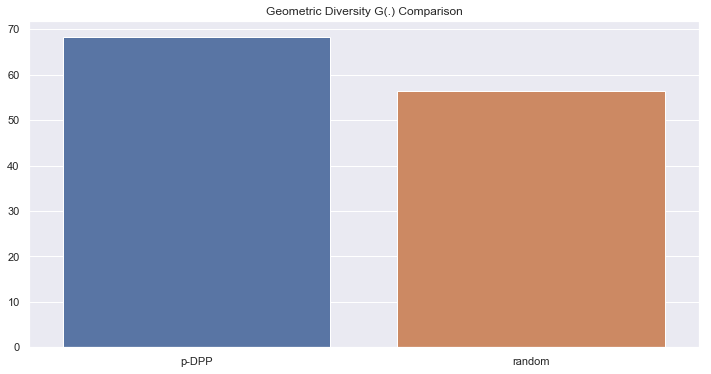

In [188]:
ax = sns.barplot(data=dfGeoDiv)
plt.title('Geometric Diversity G(.) Comparison')
plt.show()

In [152]:
nameList = ['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

In [155]:
dfSize = pd.DataFrame(columns=['Purpose', 'Count_p-dpp', 'Count_random'])
for purpose in purposeList:
    dfSize = dfSize.append({'Purpose': purpose, 
                            'Count_p-dpp': dfS[dfS[purpose]==1].shape[0],
#                             'Perc_p-dpp': '{0:.2f}%'.format((dfS[dfS[purpose]==1].shape[0]/dfS[dfS[purpose]==1].shape[1])*100),
                            'Count_random': dfRandom[dfRandom[purpose]==1].shape[0],
#                             'Perc_random': '{0:.2f}%'.format((dfRandom[dfRandom[purpose]==1].shape[0]/dfRandom[dfRandom[purpose]==1].shape[1])*100)
                           }, ignore_index=True)
dfSize['Purpose'] = nameList
dfSize

,Purpose,Count_p-dpp,Count_random
0,car,124,14
1,credit_card,112,427
2,debt_consolidation,135,1028
3,educational,132,0
4,home_improvement,144,123
5,house,133,8
6,purchase,126,38
7,medical,142,18
8,moving,130,7
9,other,124,113


In [156]:
dfCountCompare = pd.melt(dfSize, id_vars="Purpose", var_name="Approach", value_name="Count")

In [157]:
dfCountCompare

,Purpose,Approach,Count
0,car,Count_p-dpp,124
1,credit_card,Count_p-dpp,112
2,debt_consolidation,Count_p-dpp,135
3,educational,Count_p-dpp,132
4,home_improvement,Count_p-dpp,144
5,house,Count_p-dpp,133
6,purchase,Count_p-dpp,126
7,medical,Count_p-dpp,142
8,moving,Count_p-dpp,130
9,other,Count_p-dpp,124


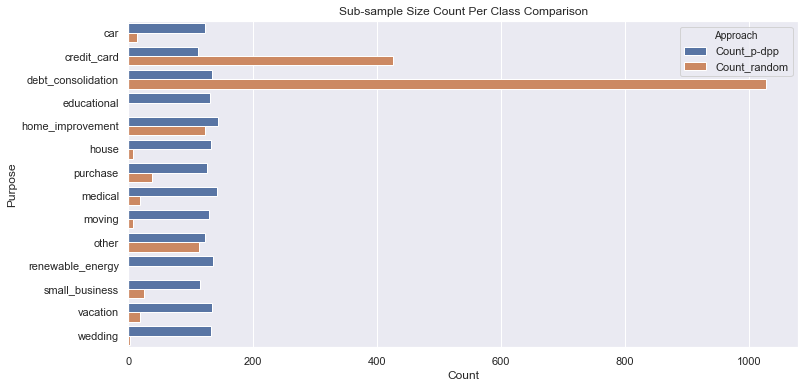

In [171]:
ax = sns.barplot(x='Count', y='Purpose', hue='Approach', data=dfCountCompare)
plt.title('Sub-sample Size Count Per Class Comparison')
plt.show()

In [166]:
dfSize = pd.DataFrame(columns=['Purpose', 'Perc_p-dpp', 'Perc_random'])
for purpose in purposeList:
    dfSize = dfSize.append({'Purpose': purpose, 
                            'Perc_p-dpp': (dfS[dfS[purpose]==1].shape[0]/dfS[dfS[purpose]==1].shape[1])*100,
                            'Perc_random': (dfRandom[dfRandom[purpose]==1].shape[0]/dfRandom[dfRandom[purpose]==1].shape[1])*100
                           }, ignore_index=True)
dfSize['Purpose'] = nameList
dfSize

,Purpose,Perc_p-dpp,Perc_random
0,car,5.944391,0.671141
1,credit_card,5.369128,20.469799
2,debt_consolidation,6.471716,49.280920
3,educational,6.327900,0.000000
4,home_improvement,6.903164,5.896453
5,house,6.375839,0.383509
6,purchase,6.040268,1.821668
7,medical,6.807287,0.862895
8,moving,6.232023,0.335570
9,other,5.944391,5.417066


In [167]:
dfPercCompare = pd.melt(dfSize, id_vars="Purpose", var_name="Approach", value_name="Percent")

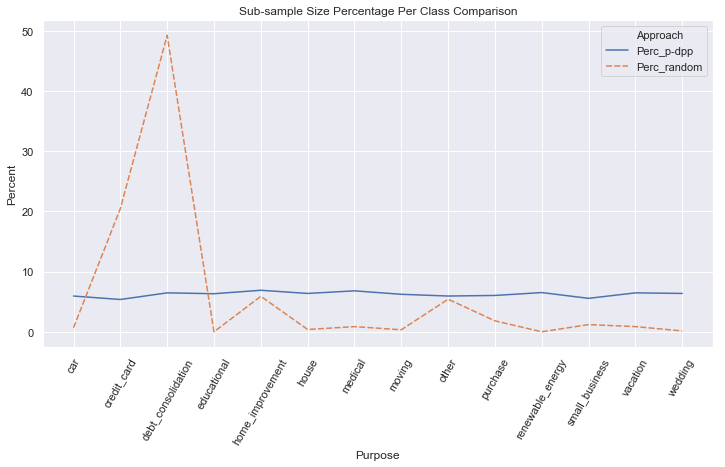

In [170]:
ax = sns.lineplot(x='Purpose', y='Percent', hue='Approach', style='Approach', data=dfPercCompare)
plt.setp(ax.get_xticklabels(), rotation=60)
plt.title('Sub-sample Size Percentage Per Class Comparison')
plt.show()